In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cPickle
import sys
import os
import gzip
import numpy as np
import powerlaw
import matplotlib.pyplot as plt
from my_foos import Lin_Log_Bins

from matplotlib import rc
rc('font', family = 'serif', serif = 'Times')
rc('text', usetex = True)

import seaborn as sns
sns.set_style("white", {'grid.color': '.0', 'grid.linestyle': '',\
                            'axes.grid': True,\
                            'xtick.direction': 'in',\
                            'xtick.major.size': 10,\
                            'xtick.minor.size': 10,\
                            'ytick.direction': 'in',\
                            'ytick.major.size': 10,\
                            'ytick.minor.size': 10,\
                            'xtick.label.size': 30,\
                            'xlabel.size': 30,\
                            'ylabel.size': 20,})

from matplotlib import rc
rc('font', family = 'serif', serif = 'Times')
rc('text', usetex = True)

In [3]:
CASE = "APS"
DatDir = "../../data/APS/aff_data_ISI_company_like_1960_2008/"

In [4]:
if CASE == "TWT":
    Beta = .48
    a_bins_factor = 1.25  
    k_bins_factor = 1.2125
elif CASE == "PRA":
    Beta = .2
    a_bins_factor = 1.2
    k_bins_factor = 1.2
elif CASE == "PRB":
    Beta = .13
    a_bins_factor = 1.2
    k_bins_factor = 1.2
elif CASE == "PRD":
    Beta = .28
    a_bins_factor = 1.2
    k_bins_factor = 1.2
elif CASE == "PRE":
    Beta = .25
    a_bins_factor = 1.2
    k_bins_factor = 1.2
elif CASE == "PRL":
    Beta = .15
    a_bins_factor = 1.2
    k_bins_factor = 1.2
elif CASE == "MPC":
    Beta = 1.2
    a_bins_factor = 1.2
    k_bins_factor = 1.2
elif CASE == "APS":
    Beta = .14
    a_bins_factor = 1.2
    k_bins_factor = 1.25
    

In [5]:
if CASE in ["TWT", "PRA", "PRB", "PRD", "PRE", "PRL", "APS"]:
    G = {}
    for fn in sorted(os.listdir(DatDir)):
        Listone = []
        with open(os.path.join(DatDir, fn), "rb") as f:
            for l in f:
                v = l.strip().split()
                Listone.append(v[:2])

        for clr, cld in Listone:
            G.setdefault(clr, {"a": .0, "n": set()})
            G.setdefault(cld, {"a": .0, "n": set()})

            G[clr]["a"] += 1.

            G[clr]["n"].add(cld)
            G[cld]["n"].add(clr)

        print fn
        
    Acts = np.array([float(n["a"]) for n in G.values()])
    Degs = np.array([float(len(n["n"])) for n in G.values()])
    
elif CASE == "MPC":
    
    DATA = cPickle.load(gzip.open(DatDir))
    
    Acts = DATA['TOT']['Vectors']['aa']
    Degs = DATA['TOT']['Vectors']['kk']

1960-01_deca0.dat
1960-01_deca1.dat
1960-02_deca0.dat
1960-02_deca1.dat
1960-03_deca0.dat
1960-03_deca1.dat
1960-04_deca0.dat
1960-04_deca1.dat
1960-05_deca0.dat
1960-05_deca1.dat
1960-06_deca0.dat
1960-06_deca1.dat
1960-07_deca0.dat
1960-07_deca1.dat
1960-08_deca0.dat
1960-08_deca1.dat
1960-09_deca0.dat
1960-09_deca1.dat
1960-10_deca0.dat
1960-10_deca1.dat
1960-11_deca0.dat
1960-11_deca1.dat
1960-12_deca0.dat
1960-12_deca1.dat
1961-01_deca0.dat
1961-01_deca1.dat
1961-02_deca0.dat
1961-02_deca1.dat
1961-03_deca0.dat
1961-03_deca1.dat
1961-04_deca0.dat
1961-04_deca1.dat
1961-05_deca0.dat
1961-05_deca1.dat
1961-06_deca0.dat
1961-06_deca1.dat
1961-07_deca0.dat
1961-07_deca1.dat
1961-08_deca0.dat
1961-08_deca1.dat
1961-09_deca0.dat
1961-09_deca1.dat
1961-10_deca0.dat
1961-10_deca1.dat
1961-11_deca0.dat
1961-11_deca1.dat
1961-12_deca0.dat
1961-12_deca1.dat
1962-01_deca0.dat
1962-01_deca1.dat
1962-02_deca0.dat
1962-02_deca1.dat
1962-03_deca0.dat
1962-03_deca1.dat
1962-04_deca0.dat
1962-04_de

In [6]:
a_bins = Lin_Log_Bins(Acts.min(), Acts.max(), factor=a_bins_factor)
k_bins = Lin_Log_Bins(Degs.min(), Degs.max(), factor=k_bins_factor)

a_freq, a_bins = np.histogram(Acts, bins=a_bins, density=False)
k_freq, k_bins = np.histogram(Degs, bins=k_bins, density=False)

a_PDF, a_bins = np.histogram(Acts, bins=a_bins, density=True)
k_PDF, k_bins = np.histogram(Degs, bins=k_bins, density=True)

a_cntrs = (a_bins[:-1] + a_bins[1:])/2.
k_cntrs = (k_bins[:-1] + k_bins[1:])/2.

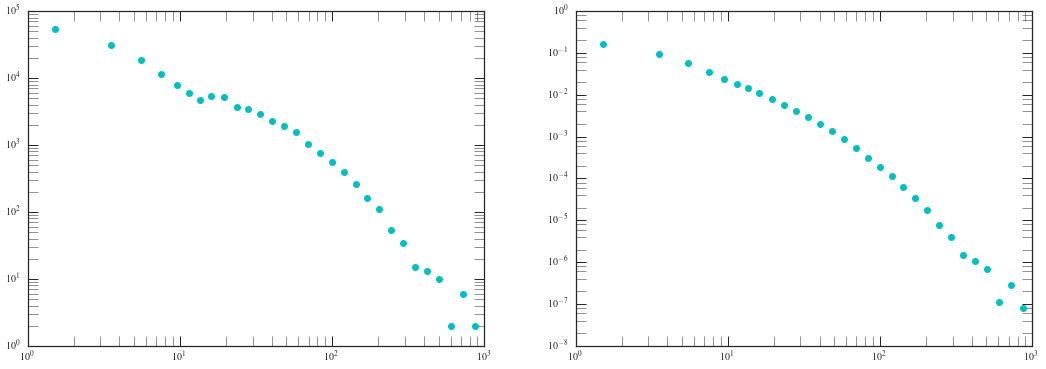

In [7]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.loglog(a_cntrs, a_freq, 'oc')
plt.subplot(122)
plt.loglog(a_cntrs, a_PDF, 'oc')

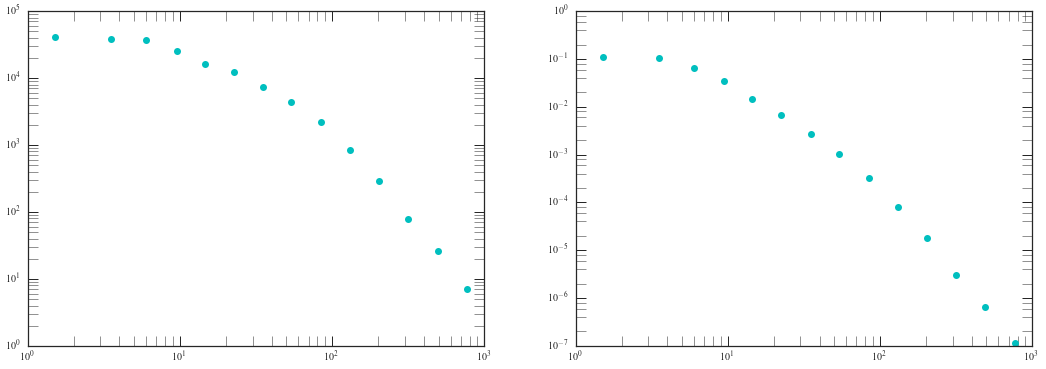

In [8]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.loglog(k_cntrs, k_freq, 'oc')
plt.subplot(122)
plt.loglog(k_cntrs, k_PDF, 'oc')

In [9]:
# Select the threshold for the valid bins (10 for <30% error)
BinThres = 10

a_cntrs = a_cntrs[a_freq>BinThres]
a_PDF = a_PDF[a_freq>BinThres]
a_freq = a_freq[a_freq>BinThres]

k_cntrs = k_cntrs[k_freq>BinThres]
k_PDF = k_PDF[k_freq>BinThres]
k_freq = k_freq[k_freq>BinThres]

Step 01 of 14 done (x = 01, d=2.77e-02)
Step 02 of 14 done (x = 02, d=2.69e-02)
Step 03 of 14 done (x = 03, d=2.51e-02)
Step 04 of 14 done (x = 04, d=2.30e-02)
Step 05 of 14 done (x = 05, d=2.03e-02)
Step 06 of 14 done (x = 06, d=1.94e-02)
Step 07 of 14 done (x = 07, d=1.61e-02)
Step 08 of 14 done (x = 08, d=1.36e-02)
Step 09 of 14 done (x = 09, d=1.07e-02)
Step 10 of 14 done (x = 10, d=9.31e-03)
Step 11 of 14 done (x = 11, d=8.31e-03)
Step 12 of 14 done (x = 12, d=7.51e-03)
Step 13 of 14 done (x = 13, d=7.42e-03)
Step 14 of 14 done (x = 14, d=7.18e-03)
Step 01 of 14 done (x = 01, d=6.15e-02)
Step 02 of 14 done (x = 02, d=3.67e-02)
Step 03 of 14 done (x = 03, d=2.75e-02)
Step 04 of 14 done (x = 04, d=2.26e-02)
Step 05 of 14 done (x = 05, d=1.97e-02)
Step 06 of 14 done (x = 06, d=1.70e-02)
Step 07 of 14 done (x = 07, d=1.24e-02)
Step 08 of 14 done (x = 08, d=9.63e-03)
Step 09 of 14 done (x = 09, d=6.50e-03)
Step 10 of 14 done (x = 10, d=6.79e-03)
Step 11 of 14 done (x = 11, d=6.61e-03)


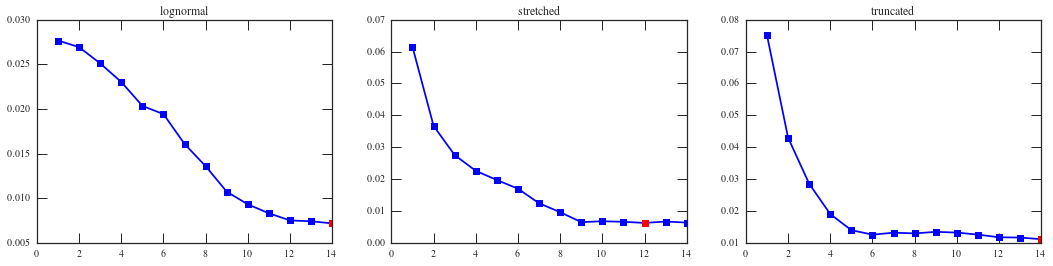

In [10]:
dist_dict={'stretched': powerlaw.Stretched_Exponential,\
           'truncated': powerlaw.Truncated_Power_Law,\
           'lognormal': powerlaw.Lognormal}


plt.figure(figsize=(18,4))

for i, [sel_dist, dist] in enumerate(dist_dict.items()):
    plt.subplot(131 + i)
    d=[]
    icsi = range(1, 15, 1)
   
    for i, ics in enumerate(icsi):
        my_dist = dist(xmin=ics, discrete=True, data=Acts)
        d.append(my_dist.KS(data=Acts[Acts>=my_dist.xmin]))
        print "Step %02d of %02d done (x = %02d, d=%.02e)" %\
            (i+1, len(icsi), ics, d[-1])

    plt.plot(icsi, d, 'sb-')
    plt.plot(icsi[d.index(min(d))], min(d), 'sr')
    plt.title(sel_dist)

In [31]:
a_minimum = 6

if True:
    if CASE == "PRA":
        a_minimum = 3
    elif CASE == "PRB":
        a_minimum = 4
    elif CASE == "PRD":
        a_minimum = 4
    elif CASE == "PRE":
        a_minimum = 4
    elif CASE == "PRL":
        a_minimum = 4
    elif CASE == "TWT":
        a_minimum = 3.5
    elif CASE == "MPC":
        a_minimum = 2.5
    elif CASE == "APS":
        a_minimum = 5

In [32]:
fit_a = powerlaw.Fit(Acts, xmin=a_minimum, xmax=None, discrete=True)

Values less than or equal to 0 in data. Throwing out 0 or negative values


In [33]:
fit_a.distribution_compare('power_law', 'stretched_exponential')

(-3648.7178029299703, 0.0)

In [34]:
fit_a.distribution_compare('power_law', 'truncated_power_law')

Assuming nested distributions


(-3553.8231149524495, 0.0)

In [35]:
fit_a.distribution_compare('power_law', 'lognormal')

(-3534.7235885693535, 0.0)

In [36]:
d_a = Acts
xminim = a_minimum

logno = powerlaw.Lognormal(xmin=xminim, data=d_a[d_a>=xminim],\
                                     discrete=True)
stret = powerlaw.Stretched_Exponential(xmin=xminim, data=d_a[d_a>=xminim],\
                                     discrete=True)
trunc = powerlaw.Truncated_Power_Law(xmin=xminim, data=d_a[d_a>=xminim],\
                                     discrete=True)

print 'LogN vs Trun: ', powerlaw.distribution_compare(d_a[d_a>=xminim],\
    'lognormal', [logno.parameter1, logno.parameter2, logno.parameter3],\
    'truncated_power_law', [trunc.parameter1, trunc.parameter2, trunc.parameter3],\
    True, xminim, d_a.max(), normalized_ratio=True)
print 'LogN vs Stre: ', powerlaw.distribution_compare(d_a[d_a>=xminim],\
    'lognormal', [logno.parameter1, logno.parameter2, logno.parameter3],\
    'stretched_exponential', [stret.parameter1, stret.parameter2, logno.parameter3],\
    True, xminim, d_a.max(), normalized_ratio=True)
print 'Trunc vs. Stre: ', powerlaw.distribution_compare(d_a[d_a>=xminim],\
    'truncated_power_law', [trunc.parameter1, trunc.parameter2, trunc.parameter3],\
    'stretched_exponential', [stret.parameter1, stret.parameter2, logno.parameter3],\
    True, xminim, d_a.max(), normalized_ratio=True)

LogN vs Trun:  (-134034.18458086875, 0.0)
LogN vs Stre:  (-154344.68927363868, 0.0)
Trunc vs. Stre:  (24.943176465887685, 2.5323281487167101e-137)


In [37]:
if CASE in ["PRA", "PRB", "PRD", "PRE", "PRL", "MPC", "APS"]:
    winning_name = "truncated"
    winning_dist = fit_a.truncated_power_law
elif CASE in ["TWT"]:
    winning_name = "lognormal"
    winning_dist = fit_a.lognormal
else:
    winning_name = "truncated"
    winning_dist = fit_a.truncated_power_law


In [38]:
winning_dist.parameter2

0.015731205979163713

In [41]:
XX_a_emprical_rescaled = a_cntrs/Acts.sum()
Acts_rescaled = Acts/Acts.sum()
fit_a_resc = powerlaw.Fit(Acts_rescaled, xmin=a_minimum/Acts.sum(), xmax=None, discrete=False)

if CASE == "TWT":
    YY_a_empirical = a_PDF*2.5e7
    fit_a_resc.distribution_compare('power_law', 'lognormal')
    winning_resc_dist = fit_a_resc.lognormal
elif CASE == "MPC":
    YY_a_empirical = a_PDF*1.5e9
    fit_a_resc.distribution_compare('power_law', 'truncated_power_law')
    winning_resc_dist = fit_a_resc.truncated_power_law
elif CASE == "PRA":
    YY_a_empirical = a_PDF*4.25e5
    fit_a_resc.distribution_compare('power_law', 'truncated_power_law')
    winning_resc_dist = fit_a_resc.truncated_power_law
elif CASE == "PRB":
    YY_a_empirical = a_PDF*17.5e5
    fit_a_resc.distribution_compare('power_law', 'truncated_power_law')
    winning_resc_dist = fit_a_resc.truncated_power_law
elif CASE == "PRD":
    YY_a_empirical = a_PDF*3.75e5
    fit_a_resc.distribution_compare('power_law', 'truncated_power_law')
    winning_resc_dist = fit_a_resc.truncated_power_law
elif CASE == "PRE":
    YY_a_empirical = a_PDF*3.925e5
    fit_a_resc.distribution_compare('power_law', 'truncated_power_law')
    winning_resc_dist = fit_a_resc.truncated_power_law
elif CASE == "PRL":
    YY_a_empirical = a_PDF*11.5e5
    fit_a_resc.distribution_compare('power_law', 'truncated_power_law')
    winning_resc_dist = fit_a_resc.truncated_power_law
elif CASE == "APS":
    YY_a_empirical = a_PDF*3.75e6
    fit_a_resc.distribution_compare('power_law', 'truncated_power_law')
    winning_resc_dist = fit_a_resc.truncated_power_law

Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions


APS
A_min 2.96603357669e-06
alpha 1.67556012661
lambda 17484.1691816
None None


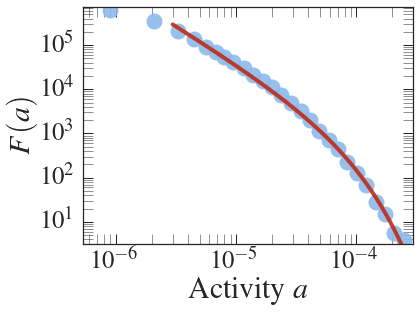

In [42]:
plt.figure(figsize=(6, 4.5))
plt.loglog(XX_a_emprical_rescaled, YY_a_empirical, 'o', color='#8CBBEA', alpha=.9, ms=16)
winning_resc_dist.plot_pdf(linestyle='-', alpha=.9, lw=4, color='#bf2d19')

print CASE
print "A_min", winning_resc_dist.xmin
print winning_resc_dist.parameter1_name, winning_resc_dist.parameter1
print winning_resc_dist.parameter2_name, winning_resc_dist.parameter2
print winning_resc_dist.parameter3_name, winning_resc_dist.parameter3

plt.xlim(XX_a_emprical_rescaled.min()*.6, XX_a_emprical_rescaled.max()*1.2)
plt.ylim(YY_a_empirical.min()*.8, YY_a_empirical.max()*1.2)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel(r"Activity $a$", size=30)
plt.ylabel(r"$F(a)$", size=30)

plt.tight_layout()
plt.savefig("a_PDF_%s.pdf"%CASE, bbox_inches="tight")

### Now prepare the ground for the $\rho(k)$

In [43]:
print winning_dist.parameter1_name, winning_dist.parameter1
print winning_dist.parameter2_name, winning_dist.parameter2
print winning_dist.parameter3_name, winning_dist.parameter3

alpha 1.41047693015
lambda 0.0157312059792
None None


In [44]:
if winning_name == 'stretched':
    def Pow_Stretch(nu):
        return (1.+Beta)*(nu-1.) + Beta

    def Exp_Stretch(nu):
        return (1.+Beta)*nu

    def Stretch_K(p, x):
        NConst = p[0]
        Lambda = p[1]
        Nu = winning_dist.parameter2

        return NConst*((x*Lambda)**(Pow_Stretch(Nu)))*\
            np.exp(-Lambda*(x**(Exp_Stretch(Nu))))

    deg_handle = Stretch_K
    
elif winning_name == 'truncated':
    def Pow_Trunc(nu, beta):
        return (1.+beta)*nu - beta

    def Exp_Trunc(beta):
        return (1.+beta)

    def Trunc_K(p, x):
        Delta = beta
        NConst = p[0]
        Lambda = p[1]
        Nu = winning_dist.parameter1

        return NConst*((x*Lambda)**(-Pow_Trunc(Nu, Beta)))*\
            np.exp(-Lambda*(x**(Exp_Trunc(Beta))))

    deg_handle = Trunc_K

elif winning_name == 'lognormal':
    def LogN_K(p, x):
        NConst = p[0]
        Mu = p[1]
        Sigma = winning_dist.parameter2 + .12
        Sigma /= 1. + Beta - .025

        return NConst/x*(np.exp(-((np.log(x)-Mu)**2.)/(2.*(Sigma**2.))))

    deg_handle = LogN_K

In [73]:
k_min = 1.5
p = [.25025e0, .000425]

if CASE == "PRA":
    k_min = 1.5
    p = [17.50025e-4, .01725]
elif CASE == "PRB":
    k_min = 3
    p = [4.2525e-4, .0075]
elif CASE == "PRD":
    k_min = 3
    p = [25.80025e-4, .017531]
elif CASE == "PRE":
    k_min = 3
    p = [9.7520025e-4, .0197507531]
elif CASE == "PRL":
    k_min = 3
    p = [24.275025e-4, .01712581]
elif CASE == "TWT":
    k_min= 4
    p = [.2, 1.76543]
elif CASE == "APS":
    k_min = 3
    p = [4.12525e-4, .005725]

In [74]:
XX_k = k_cntrs[k_cntrs > k_min]
YY_empiric_k = k_PDF[k_cntrs > k_min]

k_freq_valid = k_freq[k_cntrs > k_min]
relative_error = (k_freq_valid**-.5)

def distr_distance(pars):
    return ( (np.abs(deg_handle(pars, XX_k) - YY_empiric_k)**2.) / (relative_error*YY_empiric_k) ).sum()

from scipy.optimize import minimize
    
res = minimize(distr_distance, p, method='TNC')

In [75]:
res.x

array([ 0.0002465 ,  0.00422508])

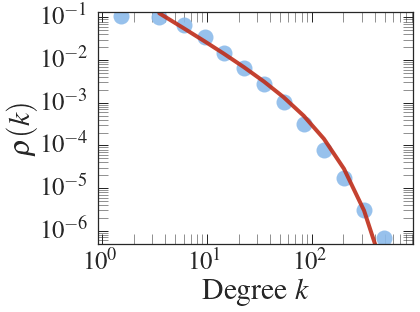

In [76]:
plt.figure(figsize=(6, 4.5))

plt.loglog(k_cntrs, k_PDF, 'o', color='#8CBBEA', alpha=.9, ms=16)

XX_k = k_cntrs[k_cntrs > k_min]
plt.loglog(XX_k, deg_handle(p, XX_k), '-', alpha=.9, lw=4, color='#bf2d19')

plt.xlim(k_cntrs.min()*.6, k_cntrs.max()*1.9)
plt.ylim(k_PDF.min()*.75, k_PDF.max()*1.2)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel(r"Degree $k$", size=30)
plt.ylabel(r"$\rho(k)$", size=30)

plt.tight_layout()
plt.savefig("k_PDF_%s.pdf"%CASE, bbox_inches="tight")